<a href="https://colab.research.google.com/github/aynaval/Hotel-booking-analysis_EDA/blob/main/Team_notebook_Hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set up

In [1]:
# Importing the libs

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pg
from matplotlib import rcParams


# set some display options:

pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15



In [2]:
# Loading data by uploading from system
#hotel_df = pd.read_csv('Hotel Bookings.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading data by uploading from drive
hotel_df = pd.read_csv('/content/drive/MyDrive/Hotel booking analysis/Copy of Hotel Bookings.csv')

# Getting a glance of the pandas dataframe

In [5]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
hotel_df.size

3820480

In [8]:
hotel_df.shape

(119390, 32)

In [9]:
# a glance of the dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **Columns and their meaning**
0. hotel 
>Hotel (Resort Hotel or City Hotel).

1. is_canceled
>Value indicating if the booking was canceled (1) or not (0).

2. lead_time
>Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

3. arrival_date_year
>Year of arrival date.

4. arrival_date_month
>Month of arrival date.

5. arrival_date_week_number
>Week number of year for arrival date.

6. arrival_date_day_of_month
>Day of arrival date.

7. stays_in_weekend_nights
>Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

8. stays_in_week_nights
>Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.

9. adults
>Number of adults.

10. children
>Number of children.

11. babies
>Number of babies.

12. meal
>Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).

13. country
>Country of origin. Categories are represented in the ISO 3155–3:2013 format.

14. market_segment
>Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

15. distribution_channel
>Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

16. is_repeated_guest
>Value indicating if the booking name was from a repeated guest (1) or not (0).

17. previous_cancellations
>Number of previous bookings that were cancelled by the customer prior to the current booking.

18. previous_bookings_not_canceled
>Number of previous bookings not cancelled by the customer prior to the current booking.

19. reserved_room_type
>Code of room type reserved. Code is presented instead of designation for anonymity reasons.

20. assigned_room_type
>Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

21. booking_changes
>Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

22. deposit_type
>Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

23. agent
>ID of the travel agency that made the booking.

24. company
>ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.

25. days_in_waiting_list
>Number of days the booking was in the waiting list before it was confirmed to the customer.

26. customer_type
>Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.

27. adr
>Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.

28. required_car_parking_spaces
>Number of car parking spaces required by the customer.

29. total_of_special_requests
>Number of special requests made by the customer (e.g. twin bed or high floor).

30. reservation_status
>Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.

31. reservation_status_date
>Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.


### **Data Cleaning**

In [11]:
# Checking percentage of null values in the dataframe
pd.concat([hotel_df.isnull().sum(),round(100*(hotel_df.isnull().sum()/len(hotel_df.index)),2)],axis=1,keys=['Missing values','Percent'])

,Missing values,Percent
hotel,0,0.00
is_canceled,0,0.00
lead_time,0,0.00
arrival_date_year,0,0.00
arrival_date_month,0,0.00
arrival_date_week_number,0,0.00
arrival_date_day_of_month,0,0.00
stays_in_weekend_nights,0,0.00
stays_in_week_nights,0,0.00
adults,0,0.00


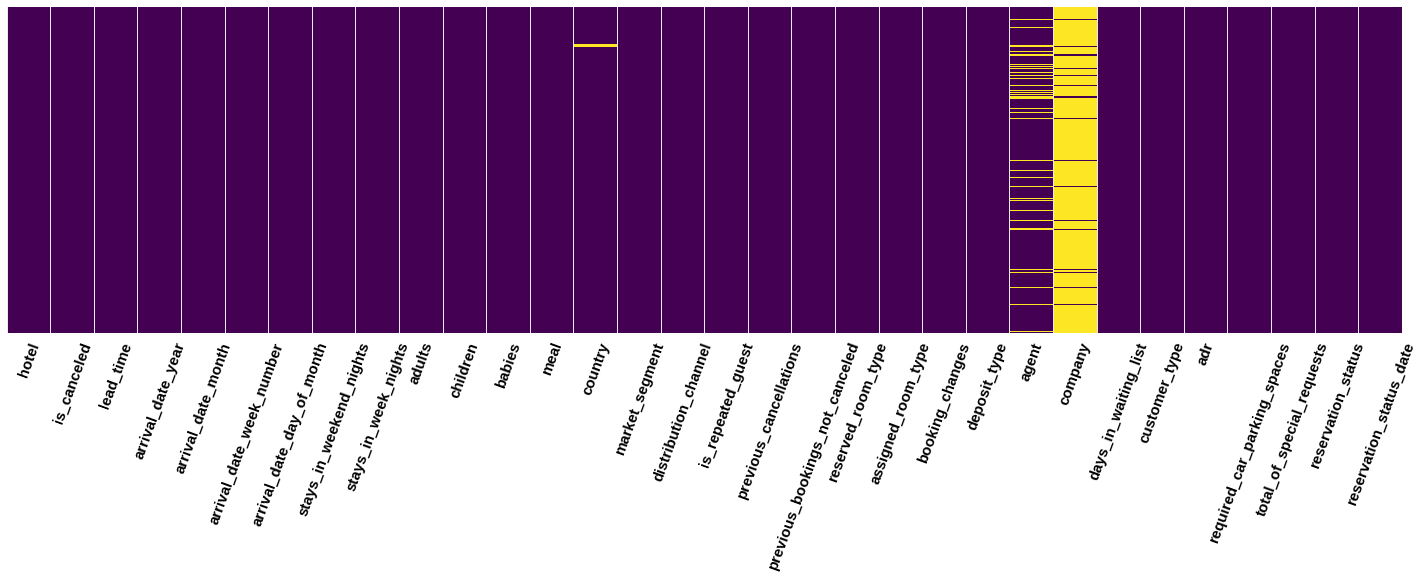

In [12]:
plt.figure(figsize=(25,6))
sns.heatmap(hotel_df.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(color = 'black', rotation = 70);

# **Dealing with null values**

## Dropping columns with highest missing values

In [13]:
# Dropping agent and company's columns as there are high percentage of null values
hotel_df.drop(columns=['company','agent'],inplace = True)

## Filling country column null values with mode

In [14]:
# getting sum of null values of the country's column
hotel_df['country'].isnull().sum()

488

In [15]:
# getting mode of the coutry's column
hotel_df['country'].mode()

0    PRT
dtype: object

In [16]:
# filling Null values of the country's column with mode of the data
hotel_df['country'] = hotel_df['country'].fillna('PRT')

## Filling children column null values with 0

In [17]:
hotel_df.fillna(0,inplace=True)

## **Checking for outliers**

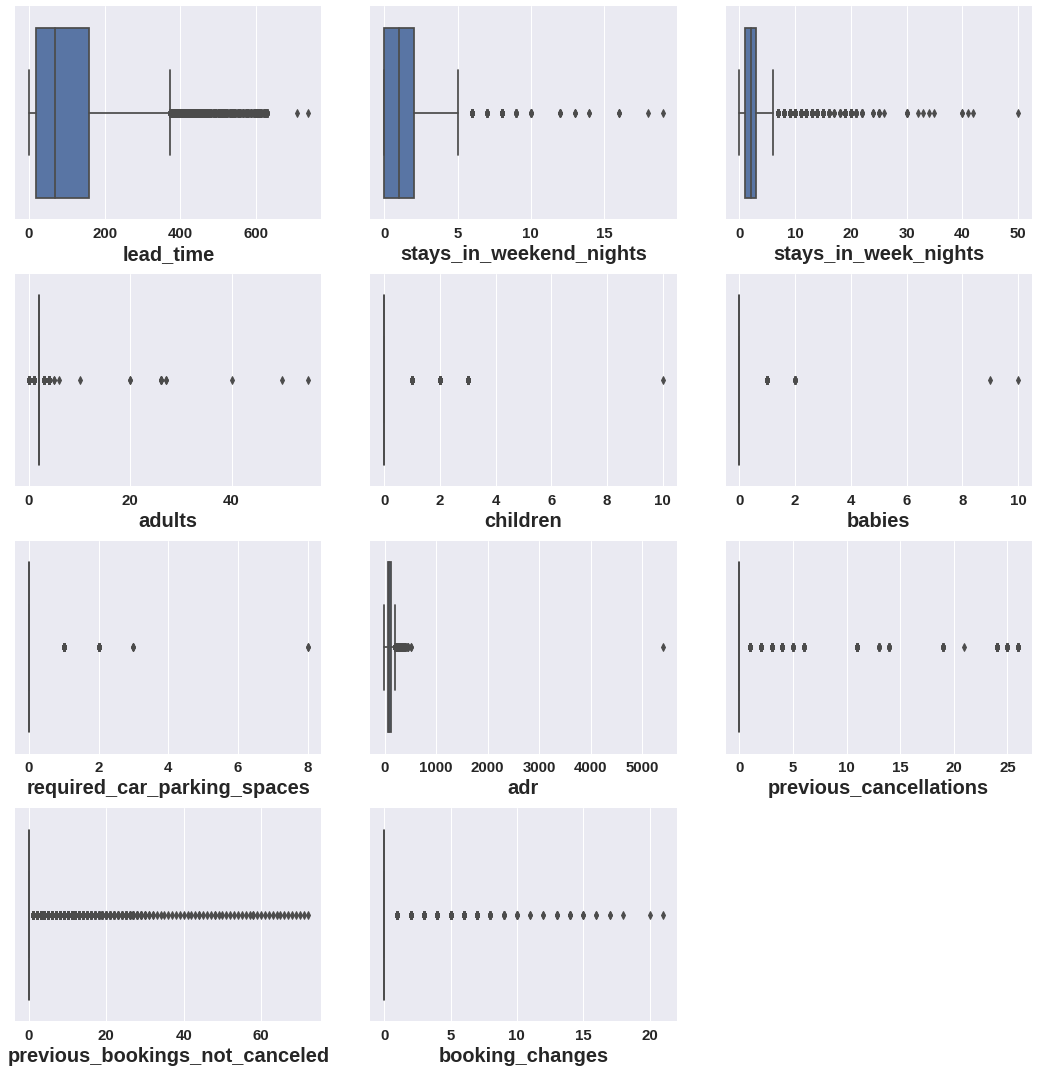

In [18]:
rcParams['figure.figsize'] = 15,15
# checking for ouliers
list_of_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1

for elem in list_of_columns:
  plt.subplot(4,3,n)
  sns.boxplot(hotel_df.loc[:,elem])
  n+=1

plt.tight_layout()



In [19]:
#removing outliers based on conditional filtering
hotel_df = hotel_df.loc[hotel_df['lead_time'] < hotel_df['lead_time'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['stays_in_weekend_nights'] < hotel_df['stays_in_weekend_nights'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['stays_in_week_nights'] < hotel_df['stays_in_week_nights'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['adults'] < 4]
hotel_df = hotel_df.loc[hotel_df['children'] < 5]
hotel_df = hotel_df.loc[hotel_df['babies'] < 4]
hotel_df = hotel_df.loc[hotel_df['required_car_parking_spaces'] < 5]
hotel_df = hotel_df.loc[hotel_df['adr'] < 1000]


## **Now our data looks clean. Let's start with  data visualisation.**

## **Which group of adults(with children/without children) have the most speical requests**





In [20]:
#creating a new column of adults with children to check weather adults prefer to travel solo or with children/babies 

def do_adults_travel_with_family(col_1,col_2):
  ''' takes argument as children and babies 
      and compares it with adults and returns
      1 for if they any children/babies and 0 
      for if they don't have any'''
  if col_1 or col_2 != 0:
    return ('with children')
  else:
    return ('without children')

hotel_df['adults_with_children'] = hotel_df.apply(lambda x: do_adults_travel_with_family(x['children'],x['babies']),axis = 1)

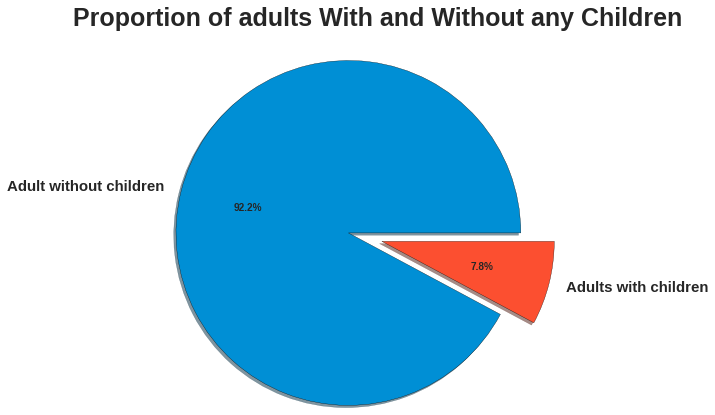

In [21]:
# visualising proportion of adults with and without any children

explode = [0.0,0.3]
labels = ['Adult without children','Adults with children']
colors = ['#008fd5','#fc4f30']
plt.figure(figsize = (10,6))
plt.pie(hotel_df['adults_with_children'].value_counts(), wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',
        explode = explode, labels = labels, colors = colors,radius = 1.5, shadow = 'True')

plt.title('Proportion of adults With and Without any Children',x = 0.6, y = 1.2)



plt.tight_layout();

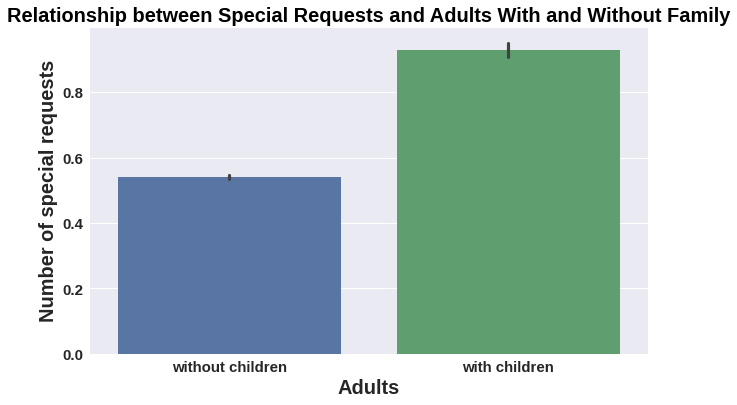

In [22]:
#checking which group of adults has the more speical requests
plt.figure(figsize=(10,6))
bar_chart = (sns.barplot(data = hotel_df, x = 'adults_with_children', y = 'total_of_special_requests')
            .set_title('Relationship between Special Requests and Adults With and Without Family', fontweight = 'bold', color = 'black' ,size = 20, x= 0.5, y= 1))

plt.xlabel('Adults')
plt.ylabel('Number of special requests');



It is evident from the piechart that almost 90% of adults prefer to travel without any children and only 10% of adults prefer to travel with family. Moreover, adults who travel without any children have the most special requests.

## **Cancellations over different months**

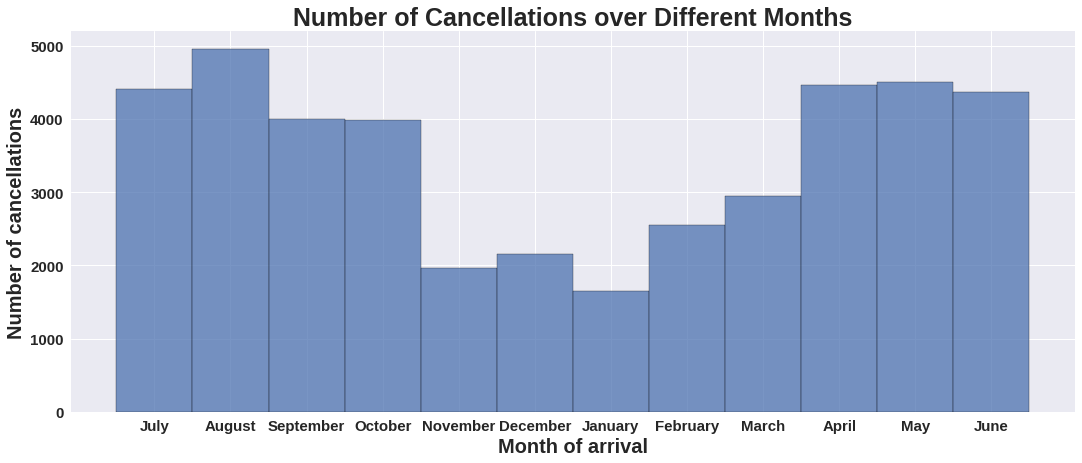

In [23]:
#number of cancellations for different months

no_of_cancellations = hotel_df.loc[hotel_df['is_canceled'] == 1, :]

plt.figure(figsize = (18,7))
histogram_plot = sns.histplot(data = no_of_cancellations , x = 'arrival_date_month', palette = 'pastel')

plt.title('Number of Cancellations over Different Months')
plt.xlabel('Month of arrival')
plt.ylabel('Number of cancellations');




### **Insights**

1.   Over the year, summer months(April-August) experienced the highest number of cancellations 
2.   However, the winter months(November-January) had the least cancellations







# **Are cancellation rates related with the lead time?**

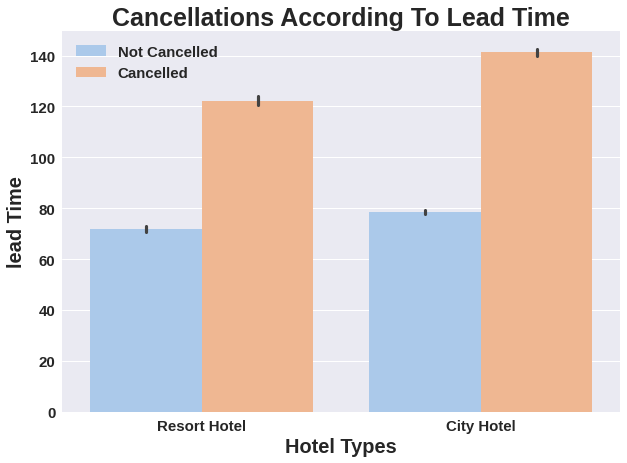

In [24]:
# connection between lead time and number of cancellations

plt.figure(figsize = (10,7))

cancelations_according_to_lead_time = hotel_df.loc[ : , ['hotel','is_canceled','lead_time']]

sns.barplot(data = cancelations_according_to_lead_time, x = 'hotel', y = 'lead_time', hue = 'is_canceled', palette= 'pastel')
plt.title('Cancellations According To Lead Time')
plt.xlabel('Hotel Types')
plt.ylabel('lead Time')

l = plt.legend()
l.get_texts()[0].set_text('Not Cancelled')
l.get_texts()[1].set_text('Cancelled');


### **Insights**

1.   It can be seen from the graph that irrespective of the hotel type customer generally cancel their bookings with high lead time.
2.  Moreover, it also become evident that if the lead time crosses 80-82 days then, the customer is bound to cancel their booking.



#  **Relationship between deposit type and cancellations**

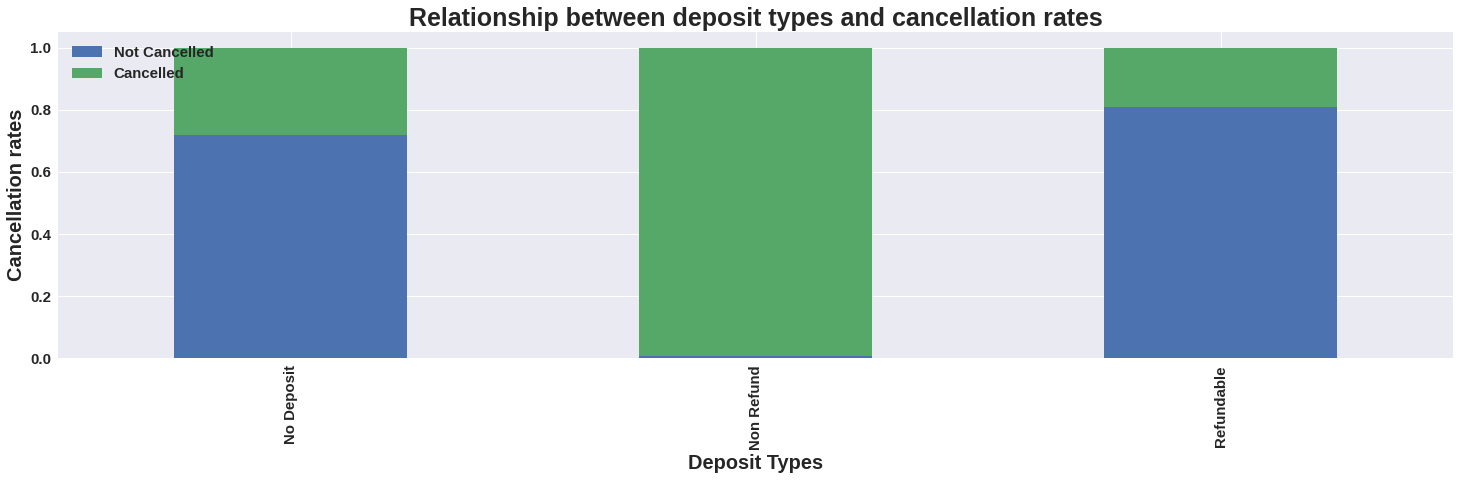

In [25]:
deposit_cancelltion_barplot = hotel_df.groupby('deposit_type')['is_canceled'].value_counts(normalize=True).unstack('is_canceled').plot.bar(stacked=True,figsize = (25,6))

plt.xlabel('Deposit Types')
plt.ylabel('Cancellation rates')
plt.legend(['Not Cancelled','Cancelled'],loc=2)

plt.title('Relationship between deposit types and cancellation rates');


**Insights**

1.   First of all, customers who have paid non-refundable deposit, most of them are bound their booking.
2.   Secondly, customers have paid either no deposit or refundable deposit are likely to not cancel their booking as comapared to customers who have paid non-refundable deposit.




# **ADR over the months**

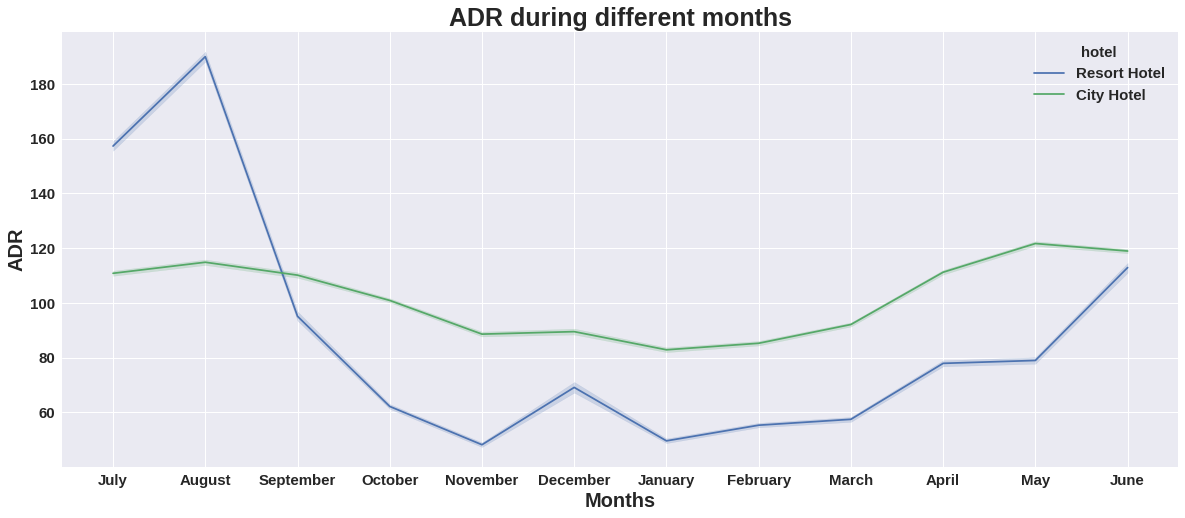

In [26]:
plt.figure(figsize = (20,8))

sns.lineplot(data = hotel_df, x = 'arrival_date_month', y = 'adr', hue = 'hotel').set_title('ADR during different months')
plt.xlabel('Months')
plt.ylabel('ADR');


### **Insights**

1.   ADR was the resort hotel was at its peak during the summer months(May-August) and bottom in months of October-Janaury
2.   On the other hand, for the city hotel ADR was relatively same in all the months and followed the same pattern as the resort hotel.



# **Most revenue generating hotel rooms and which customer group books them**

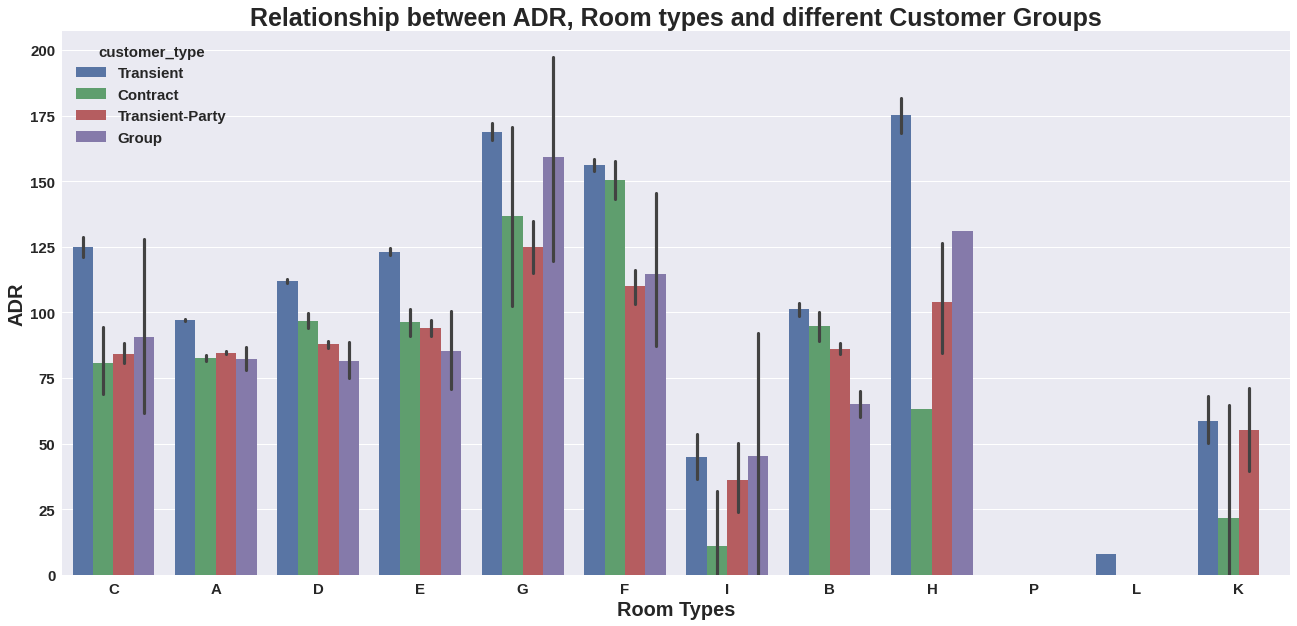

In [27]:
plt.figure(figsize = (22,10))

sns.barplot(data = hotel_df, y = 'adr', x = 'assigned_room_type', hue = 'customer_type')

plt.xlabel('Room Types')
plt.ylabel('ADR')
plt.title('Relationship between ADR, Room types and different Customer Groups');

### **Insights**

1.   It can be seen that, transient customers are the paying the most to stay in the hotel across all room types.
2.   Furthermore, rooms G,F and H are the most profitable rooms.



# **Lead time of each market segment**

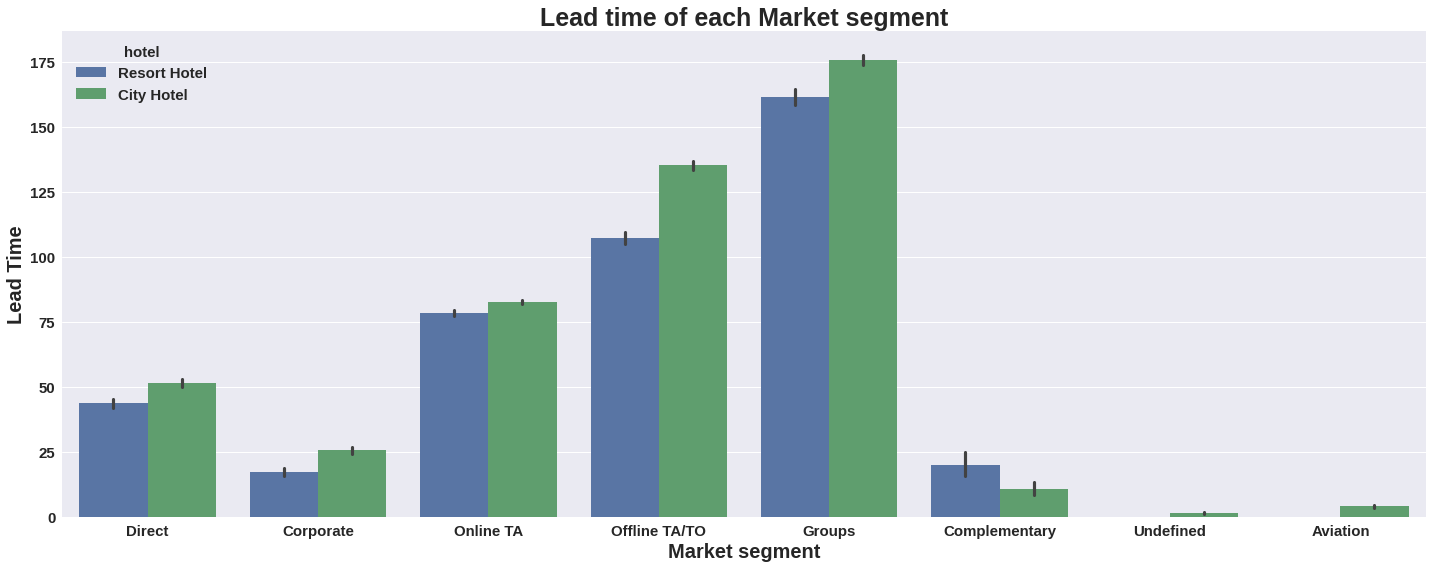

In [28]:
plt.figure(figsize=(20,8))
sns.barplot(x = "market_segment", y = "lead_time", data = hotel_df, hue = "hotel");
plt.title('Lead time of each Market segment')
plt.xlabel('Market segment')
plt.ylabel('Lead Time')
plt.tight_layout();



### **Insights**
* It can be see from the graph that Groups have the highest lead time, while aviation has the least lead time.
* It is also notable that aviation sector has least booking in Resort hotel. 


## **Number of days at hotel per market segment**

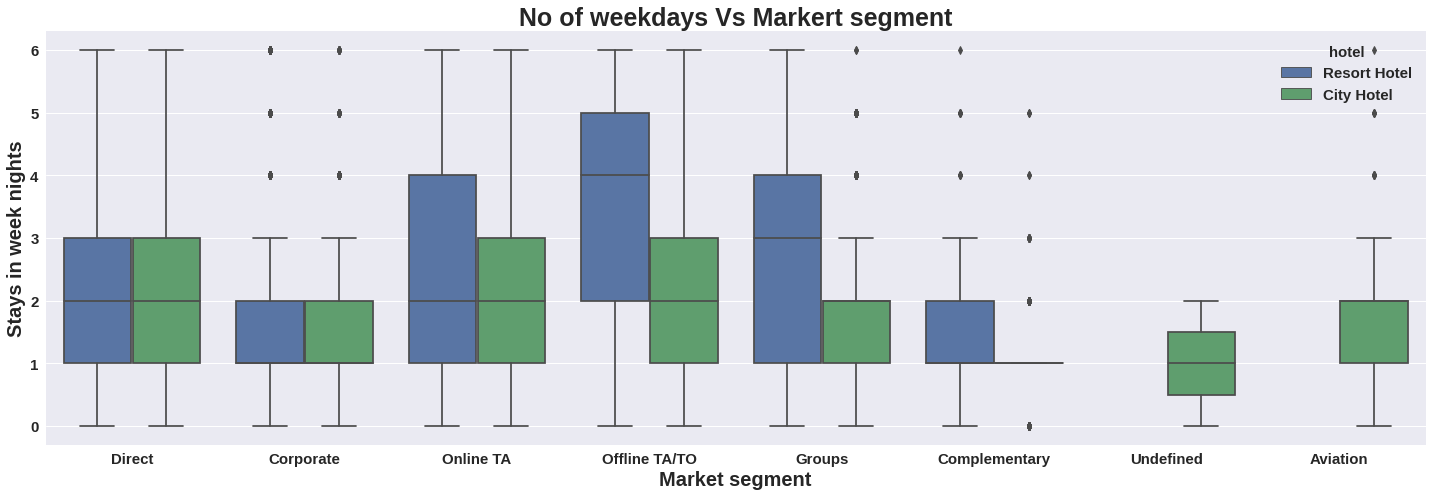

In [29]:
plt.figure(figsize=(20,7))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = hotel_df, hue = "hotel");
plt.title('No of weekdays Vs Markert segment')
plt.ylabel('Stays in week nights')
plt.xlabel('Market segment')
plt.tight_layout();

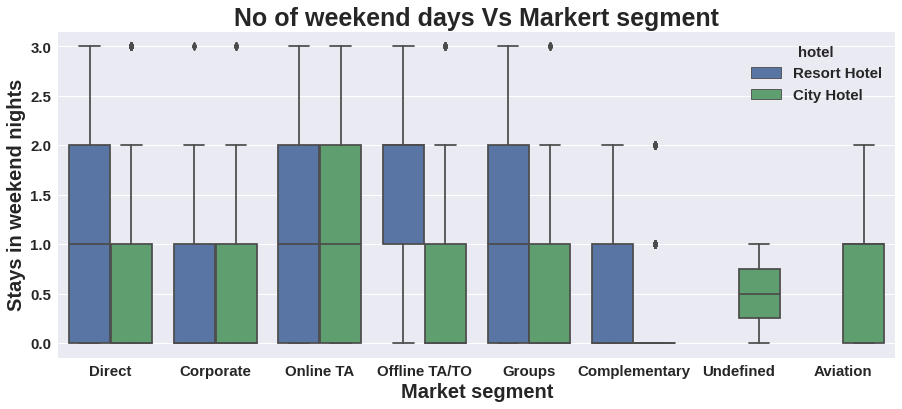

In [30]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = hotel_df, hue = "hotel");
plt.title('No of weekend days Vs Markert segment');
plt.ylabel('Stays in weekend nights')
plt.xlabel('Market segment');



### **Insights**

Most people do not seem to prefer to stay at the hotel for more than 1 week.
Customers in the Aviation Segment are likely to arrive shortly due to business.
Customers from Aviation Segment do not seem to be staying at the resort hotels.

##**Relation between reserved and assigned room type**

### **Insights**

Below crosstable shows if there is any difference between assigned and reserved room types. The results are shown as a percentage. Average 87% of bookings keep their reserved room and the rest of the' rooms have been changed. Every row represents the reserved type and distribution over the columns shows what was the assigned room despite of reserved type.

In [31]:
(hotel_df['reserved_room_type']==hotel_df['assigned_room_type']).value_counts().values[0]/len(hotel_df) *100

87.22549825893717

In [32]:
pd.crosstab(index=hotel_df['reserved_room_type'],columns=hotel_df['assigned_room_type'],normalize='index',margins=True).round(2)*100

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,85.0,1.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,10.0,88.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,7.0,2.0,0.0,1.0,0.0,0.0,0.0
F,0.0,1.0,0.0,0.0,1.0,94.0,4.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,97.0,0.0,1.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0,0.0
L,20.0,20.0,20.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,20.0,0.0


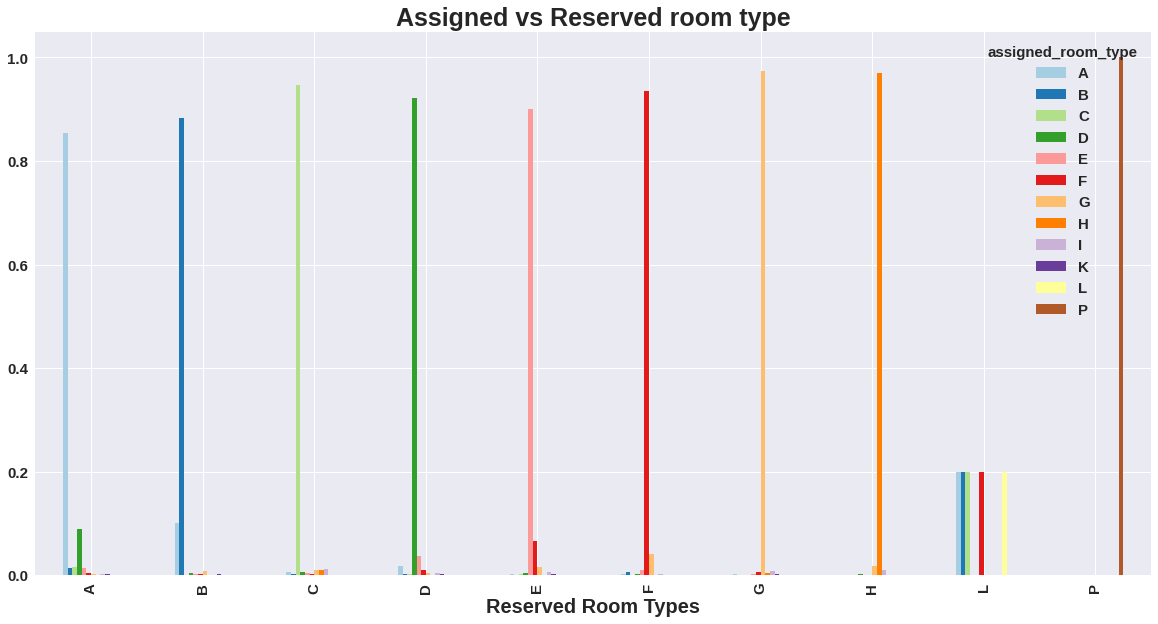

In [33]:
pd.crosstab(index=hotel_df['reserved_room_type'],columns=hotel_df['assigned_room_type'],normalize='index').plot(figsize=(20,10),kind="bar",stacked=False,colormap='Paired')
plt.title('Assigned vs Reserved room type')
plt.xlabel('Reserved Room Types');


##**Co-relationship between Reserved room type and assigned room type**

In [34]:
df = hotel_df.loc[:,['assigned_room_type','reserved_room_type']]
df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,assigned_room_type,reserved_room_type
assigned_room_type,1.000000,0.712429
reserved_room_type,0.712429,1.000000


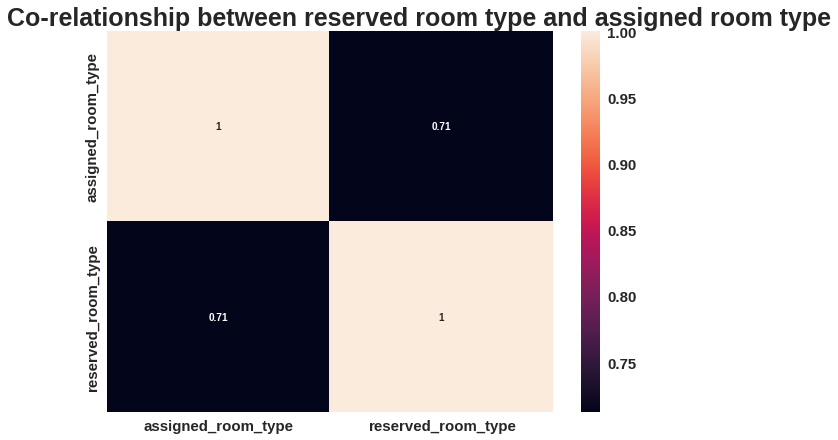

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1),annot= True);
plt.title('Co-relationship between reserved room type and assigned room type',x = 0.7);


# **Number of City Hotels and Resort Hotels**

Text(0, 0.5, 'Count')

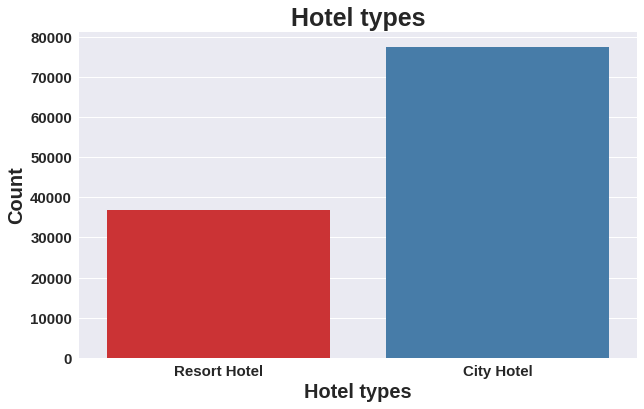

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(hotel_df['hotel'],palette="Set1")
plt.title('Hotel types')
plt.xlabel('Hotel types')
plt.ylabel('Count')




### **Insights**

There are more City hotels than Resort hotels the reason could be there is more demand for city hotels.

##**Cancellations by repeated Guests**

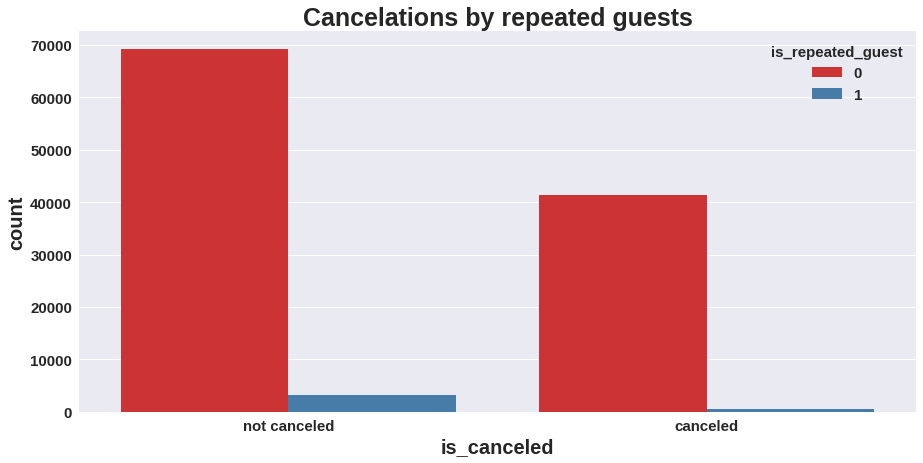

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=hotel_df,x='is_canceled',hue='is_repeated_guest',ax=ax,palette="Set1")
plt.title('Cancelations by repeated guests')
plt.legend(title='is_repeated_guest')
ax.set_xticklabels(['not canceled','canceled'])
plt.xlabel('is_canceled')
plt.ylabel('count');


### **Insights**

Repeated guests cancel less relative to non-repeated guests

# **Cancellations according to Special Requests**

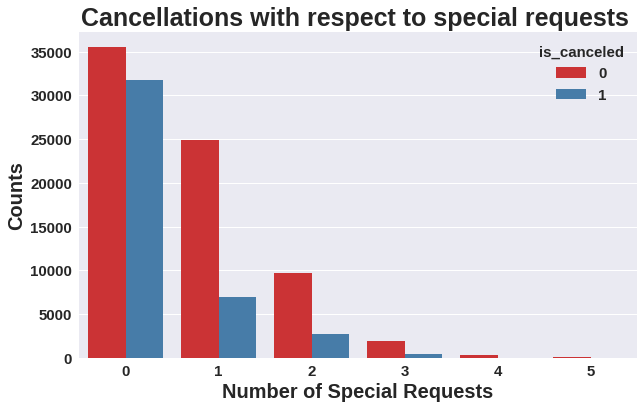

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=hotel_df,x='total_of_special_requests',hue='is_canceled',palette="Set1")
plt.title('Cancellations with respect to special requests ')
plt.xlabel('Number of Special Requests')
plt.ylabel('Counts');

### **Insights**
Guests who have more than 1 special request are less prone to cancel their booking

# **How likely is the customer about to cancel based on previous booking cancellations**

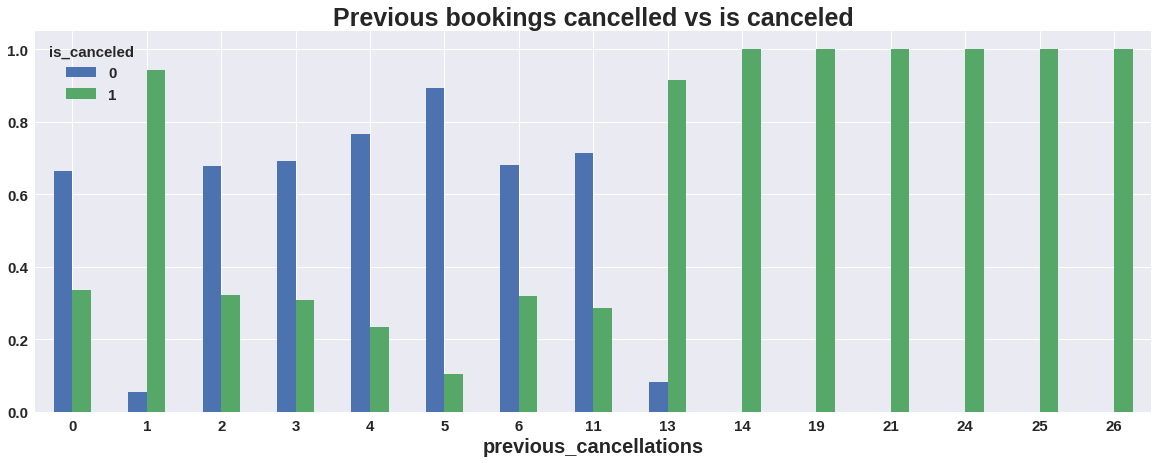

In [39]:

pd.crosstab(index=hotel_df['previous_cancellations'],columns=hotel_df['is_canceled'],normalize='index').plot(kind='bar',figsize=(20,7))
plt.title('Previous bookings cancelled vs is canceled')
plt.xticks(rotation=0);



### **Insights**
It can be seen that guests with more than 11 previous cancellations have a very high probability to cancel their booking.

##**Popular meal options provided by hotels**

Text(0.5, 1.0, 'Most popular meal type')

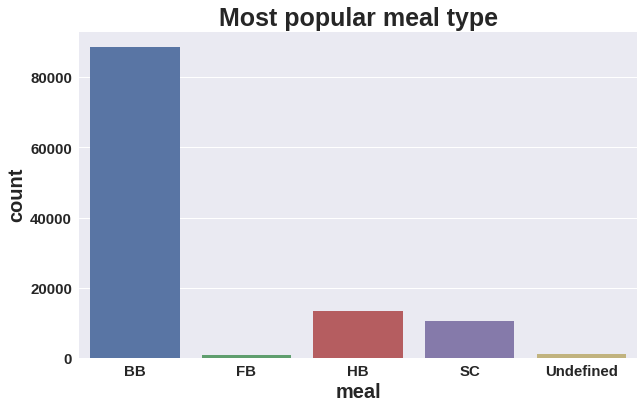

In [40]:
plt.figure(figsize = (10,6))
sns.countplot(data = hotel_df, x = 'meal')
plt.title('Most popular meal type')

##**Insights**


1.   BB is the most popular meal option.
2.   Other than that, other options are HB and SC.



##**Meal prefernces of different customer groups**

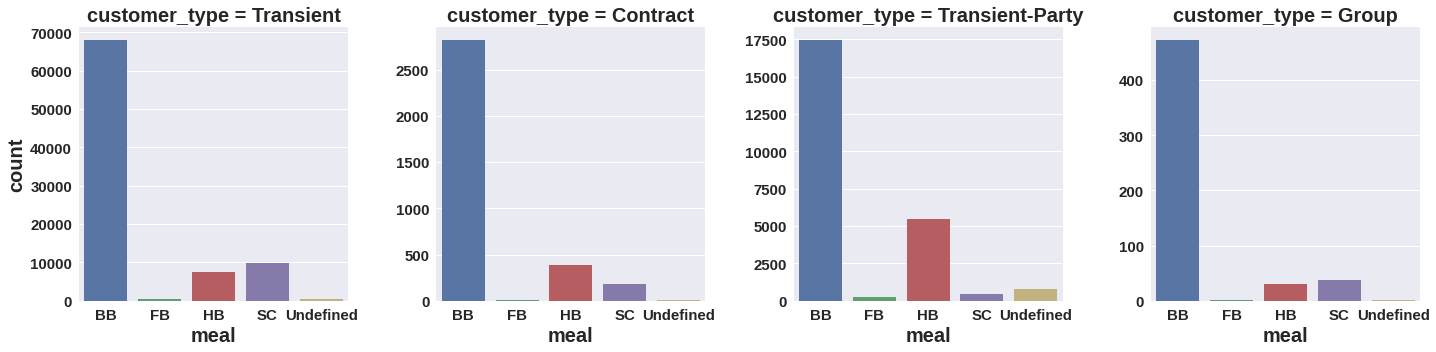

In [41]:
sns.catplot(data=hotel_df,x='meal',col='customer_type',kind='count',sharey=False);

###**Insights**
*   Among all the customers BB is the most popular meal option.
*   No customer group prefers FB, it the least popular meal option.








## **Months of arrival preferred by different customer groups.**

---



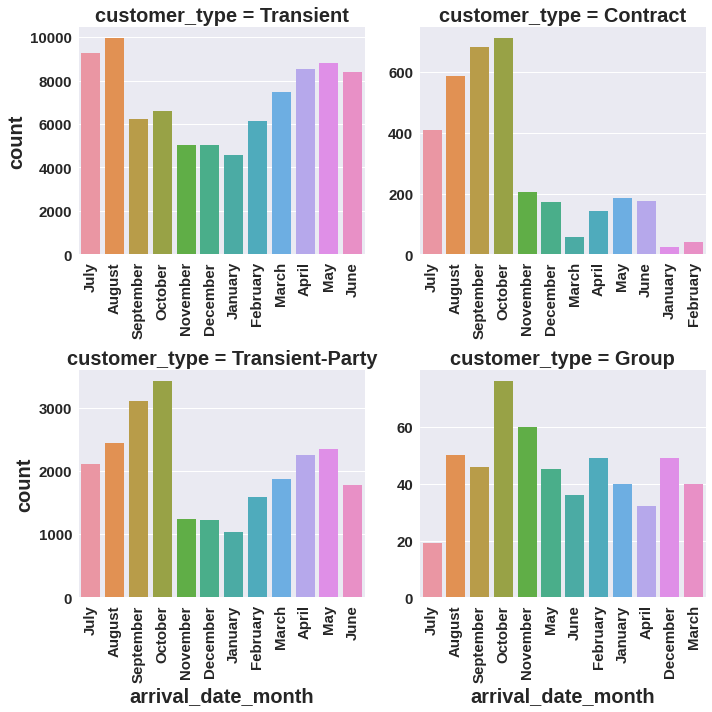

In [42]:
sns.catplot(data=hotel_df,x='arrival_date_month',col='customer_type',kind='count',sharey=False,col_wrap=2,sharex=False).set_xticklabels(rotation=90)
plt.tight_layout()


## **Insights**
* October Month is most prefered by the group customer type and July least prefered by the Group customer type.
* August month is the most prefered month by Transient customer type and January is the least prefered by Transient group type.

### **Months with the highest cancellations**

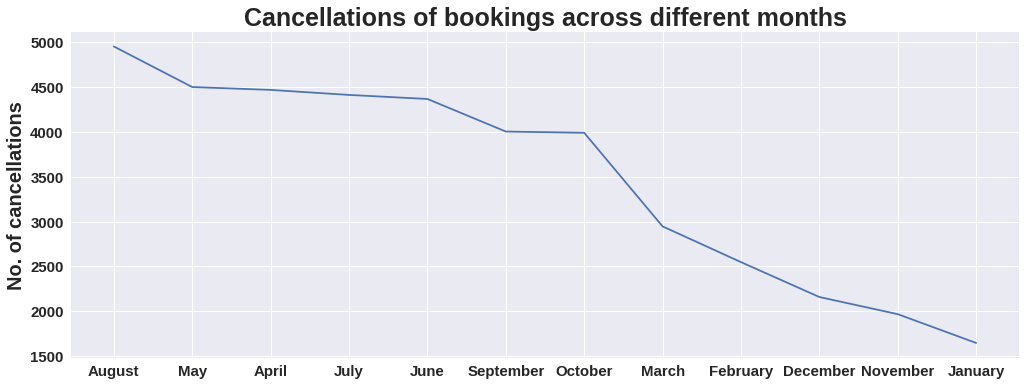

In [43]:
plt.figure(figsize=(17,6))
sns.lineplot(x= hotel_df[hotel_df['is_canceled']==1]['arrival_date_month'].value_counts().index,y=hotel_df[hotel_df['is_canceled']==1]['arrival_date_month'].value_counts().values)
plt.ylabel('No. of cancellations')
plt.title("Cancellations of bookings across different months");

###**Insights**


*   In summer months(April-september) hotels have high cancellation rates.
*   During the winter months(October-January) cancellations rates for the hotels are low



##**Customer type with the most cancellations**

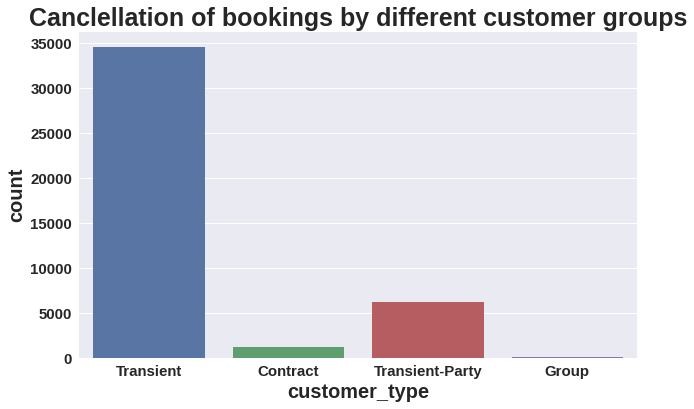

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(hotel_df[hotel_df['is_canceled']==1]['customer_type'])
plt.title("Canclellation of bookings by different customer groups");

###**Insights**

*   Most number of canclellations are done by the transient customer group.




##**What type of deposit is most preferred by the people?**

In [45]:
hotel_df.deposit_type.value_counts(normalize=True)


No Deposit    0.878799
Non Refund    0.119836
Refundable    0.001365
Name: deposit_type, dtype: float64

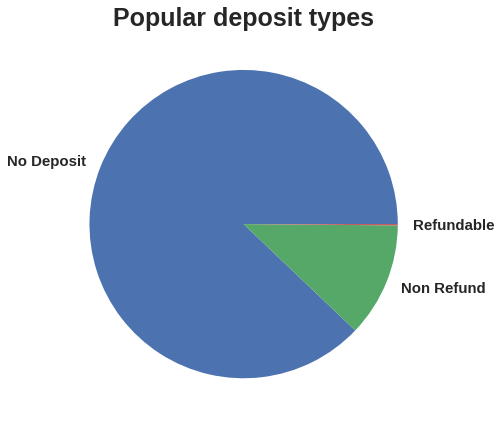

In [46]:
plt.figure(figsize=(15,6))
hotel_df.deposit_type.value_counts(normalize=True).plot(kind='pie')
plt.title('Popular deposit types')
plt.ylabel('')
plt.tight_layout();

##**Insights**


*  Out of all deposite more than 85% people prefer No deposite and only less than 2% people prefer Refundable deposite type




##  **What is the relation between cancelations and deposit type**

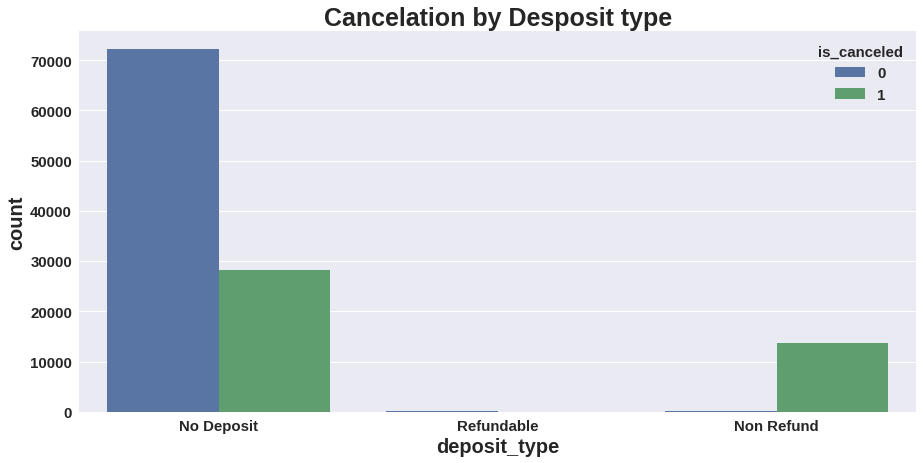

In [47]:
plt.figure(figsize=(15,7))
sns.countplot(data=hotel_df,x='deposit_type',hue='is_canceled')
plt.xticks(rotation=0)
plt.title('Cancelation by Desposit type');

##**Cancellation rates of both the hotel types**

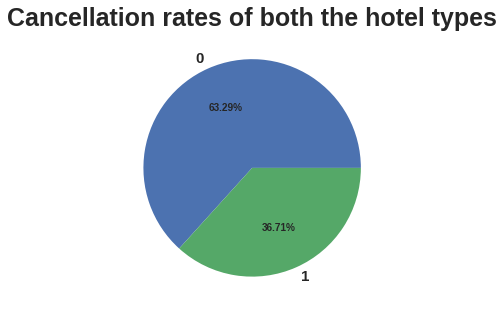

In [48]:
hotel_df["is_canceled"].value_counts().plot(kind="pie",autopct="%1.2f%%",figsize=(10,5))
plt.title("Cancellation rates of both the hotel types")
plt.ylabel('');

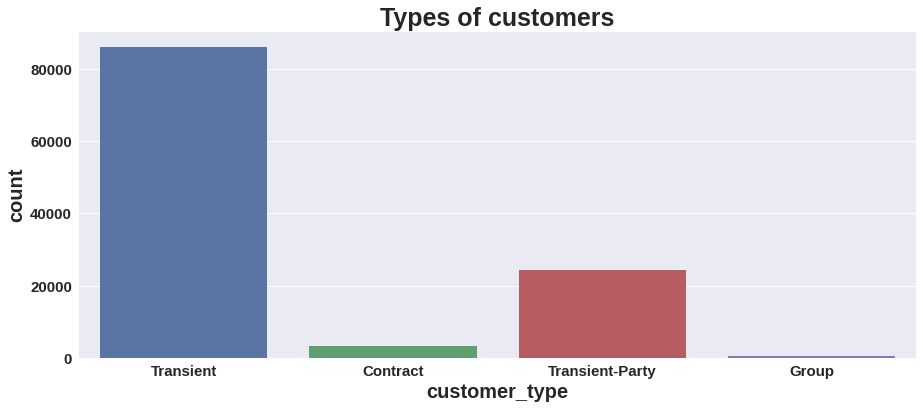

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(data=hotel_df,x='customer_type')
plt.title('Types of customers');

## **Insights**
* Most of the Guests are Tansient type.

##**Waiting times for different market segments**

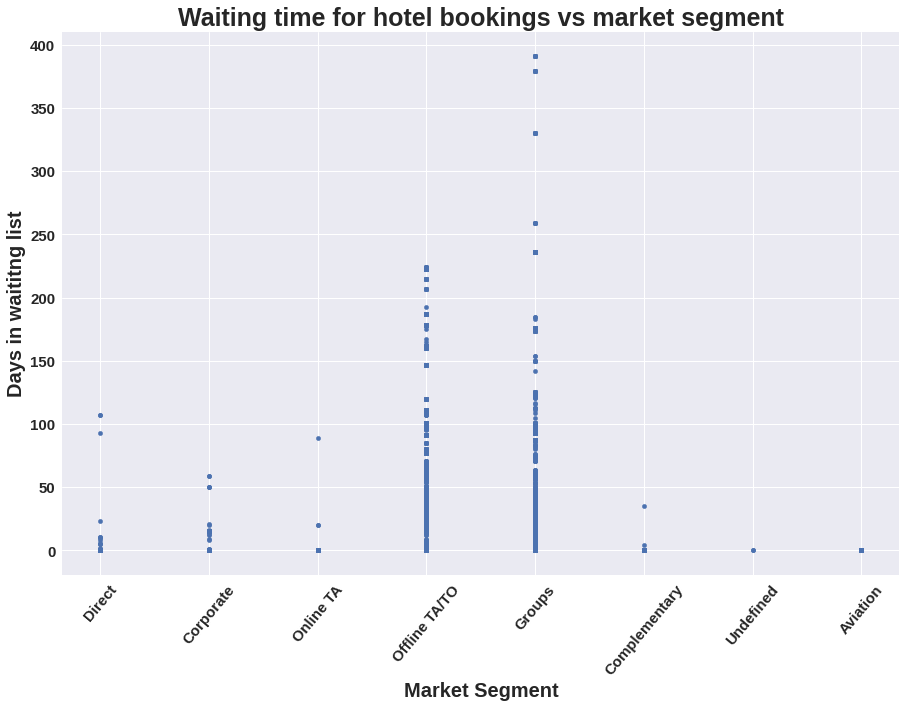

In [50]:
#This is a scatter plot for Market segment and days_in_waiting_list 

hotel_df.plot.scatter(x='market_segment', y = 'days_in_waiting_list',figsize = (15,10))
plt.title('Waiting time for hotel bookings vs market segment')
plt.xticks( rotation = 50)
plt.ylabel('Days in waititng list')
plt.xlabel('Market Segment');



###**Insights**

* Groups have the highest waiting time.
* Aviation has the least waiting time.

##**Popular market segments**




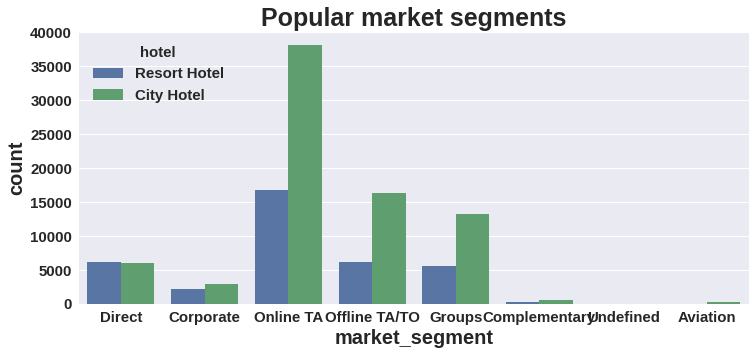

In [51]:
#How do people do book the most
plt.figure(figsize=(12,5))
ax = sns.countplot(x="market_segment", hue="hotel", data=hotel_df)
plt.title('Popular market segments');



## **Insights**
* Online TA is the most popular market segment for both types of hotels.

##**Market segment over the years**

<Figure size 1440x1080 with 0 Axes>

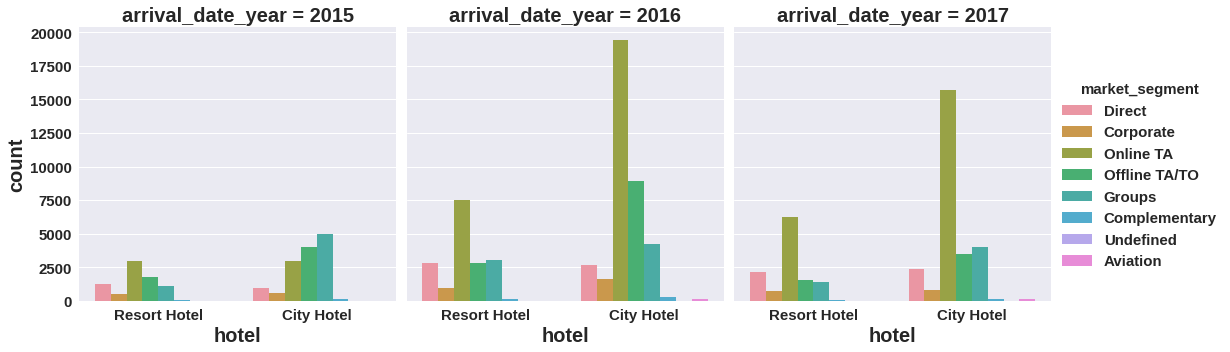

In [52]:
plt.figure(figsize = (20,15))
sns.catplot(x="hotel", hue="market_segment", col="arrival_date_year",
                data=hotel_df, kind="count");
              



## **Insights**
* Online booking segment has grown over the years and reach its peak in 2016.
* Corporate witnessed insignificant increase in the three years.
* Groups and offline TA also saw significant increase over the three years.
*Direct remained same for the 3 years.
* Aviation  and complementary has remained stagnant. 

##**ADR of different room types**

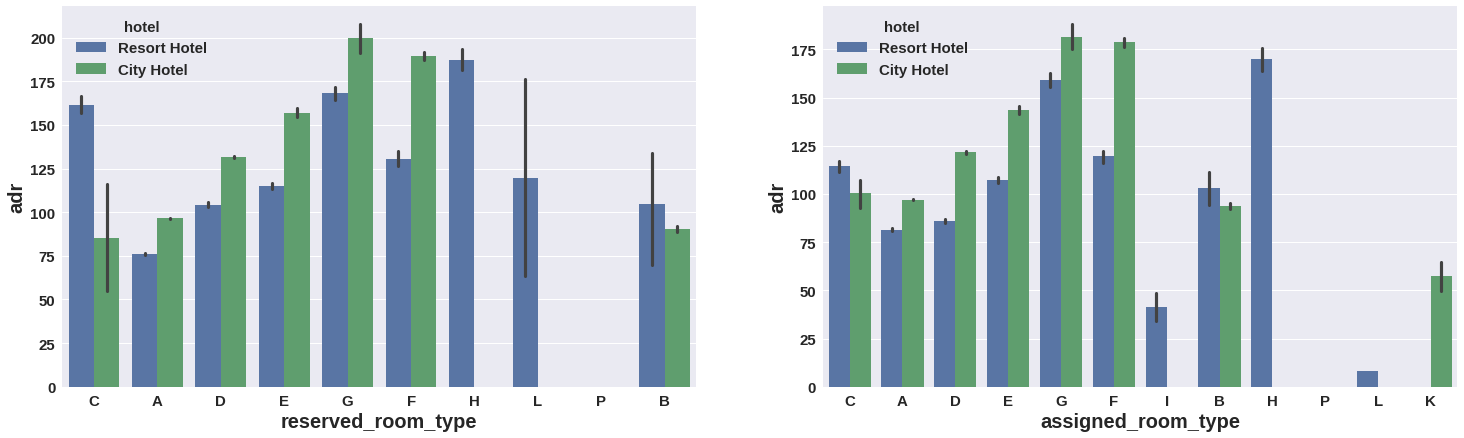

In [69]:
fig,ax =plt.subplots(1,2,figsize=(25,7))
sns.barplot(data=hotel_df,x="reserved_room_type",y="adr",hue="hotel",ax=ax[0])
sns.barplot(data=hotel_df,x="assigned_room_type",y="adr",hue="hotel",ax=ax[1]);


## **Insights**
* Room type G and F are the have the highest adr for City hotel.
* Room type H, G and C are the have the highest adr for Resort hotel.

##**Countries with the highest customers**

In [54]:
country_count = hotel_df['country'].value_counts().to_frame()
country_count.columns = ['Count']
fig_country = px.choropleth(country_count, color='Count',
                    locations=country_count.index,
                    hover_name=country_count.index,
                    color_continuous_scale=px.colors.sequential.YlGn)
fig_country.update_traces(marker=dict(line=dict(color='#7201a8', width=1)))
fig_country.update_layout(title_text='Number of Records by Countries',
                  title_x=0.5, title_font=dict(size=22),)
fig_country.show()

## **Top 5 countries to focus on**

In [55]:
 mask = hotel_df['country'].value_counts().index
 clrs = ['black' if (x in mask[:5]) else 'orange' for x in mask]

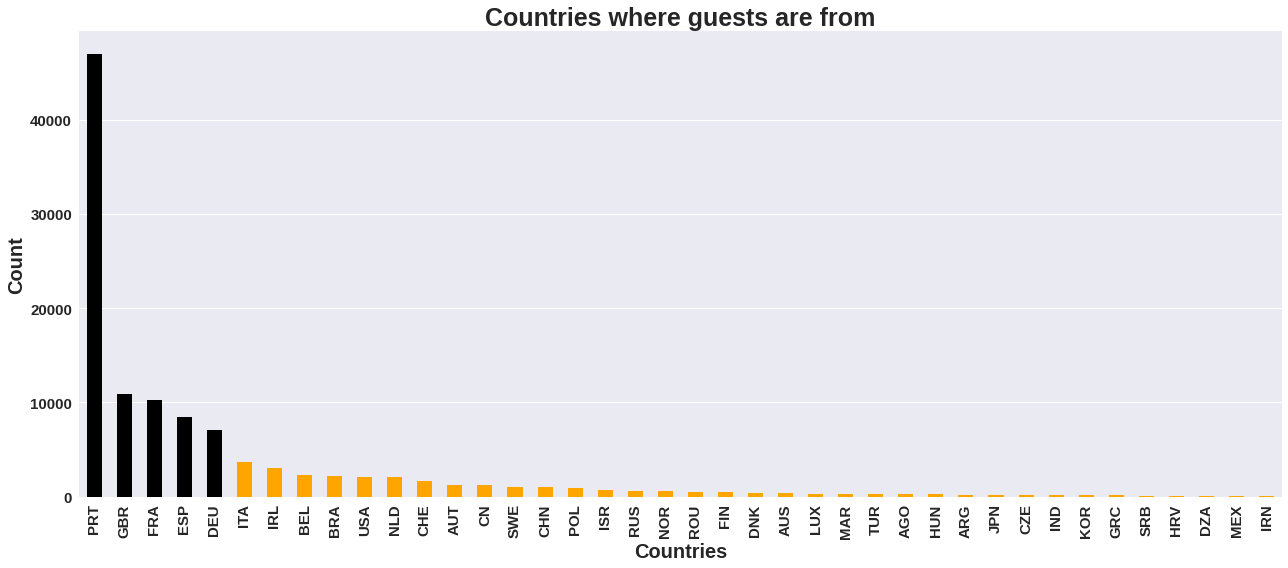

In [56]:
# top 10 countries to focus on
hotel_df['country'].value_counts()[:40].plot(kind='bar',figsize = (18,8),color=clrs);
plt.grid(axis = 'x')
plt.title('Countries where guests are from')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.tight_layout()


## **Insights**
* Most guests come from Portugal(PTR), Great Britain(GBR), France(FRA), Spain(ESP), Germany(DEU), Italy(ITA), Ireland(IRL), Belgium(BEL), Brazil(BRA) and Netherlands(NLD).

## **Most booked room type**

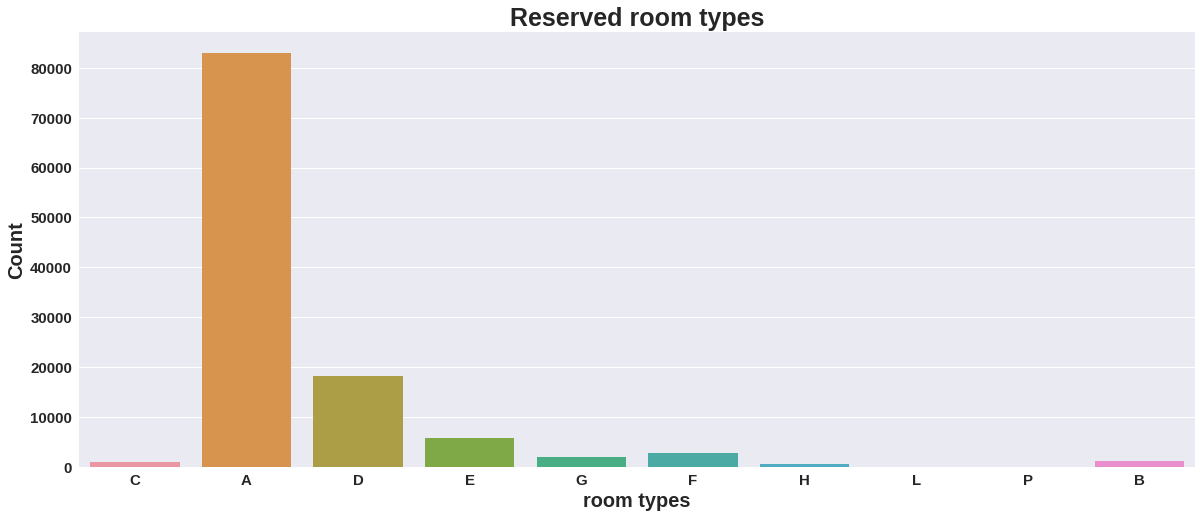

In [57]:
plt.figure(figsize=(20,8))
sns.countplot(data=hotel_df,x='reserved_room_type')
plt.title('Reserved room types',size = 25,fontweight='bold')
plt.ylabel('Count')
plt.xlabel('room types');



## **Insights**
* Room type A is the most popular room followed by D and E.

## **Special requests of each market type**

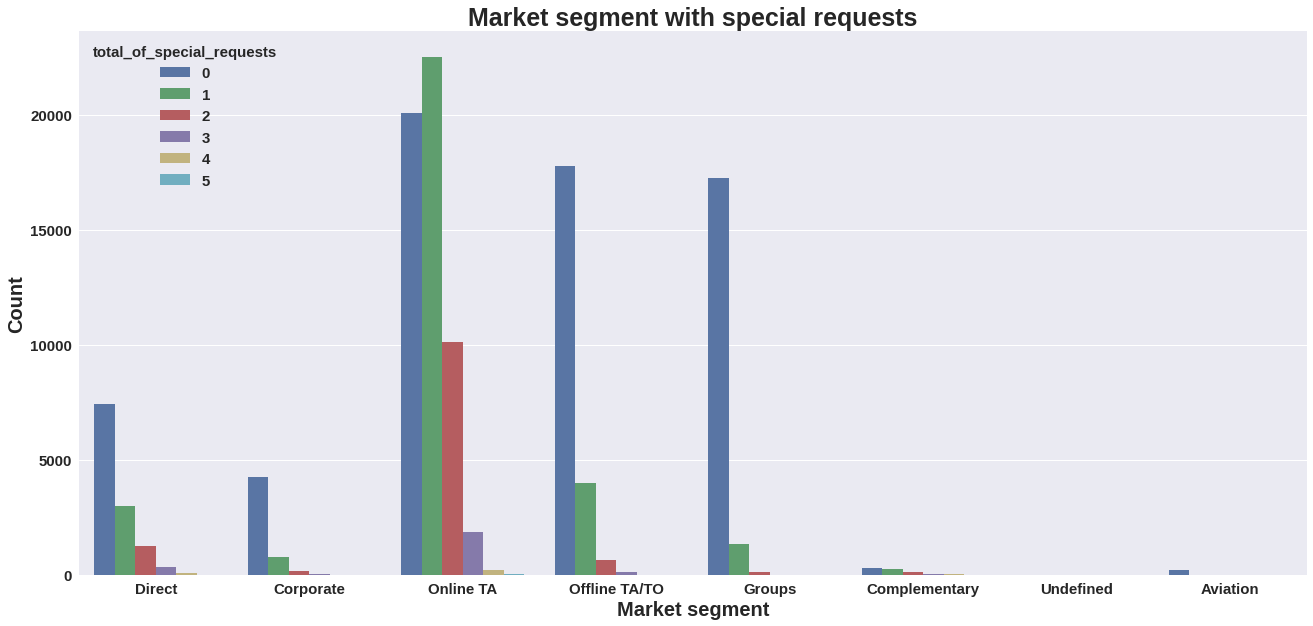

In [58]:
# Special requests of each market type
plt.figure(figsize=(22,10))
sns.countplot(data=hotel_df,x='market_segment',hue='total_of_special_requests')
plt.title('Market segment with special requests')
plt.ylabel('Count');
plt.xlabel('Market segment');



### **Insights**
Online TA type of market segment has disproportionatly high special requests.

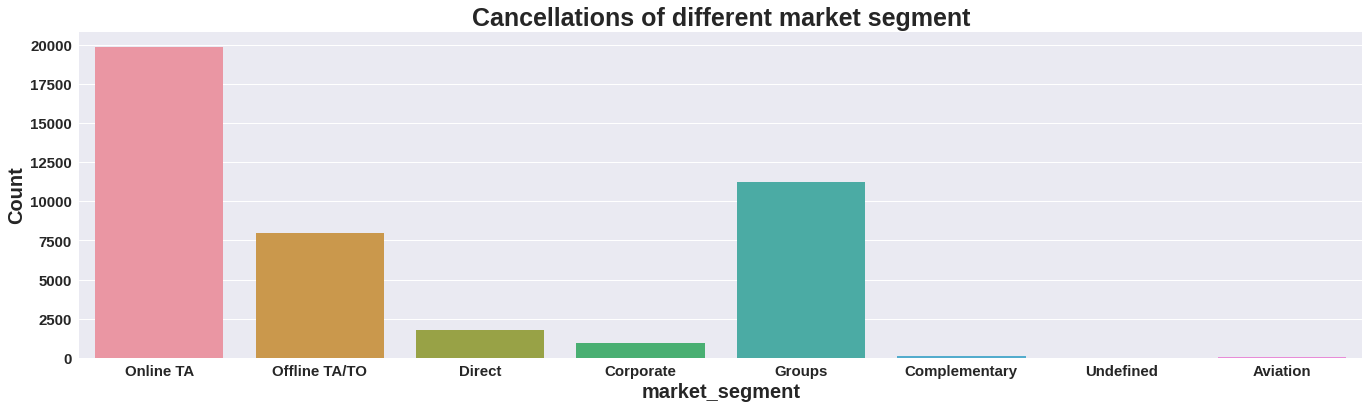

In [59]:
plt.figure(figsize=(23 ,6))
sns.countplot(x=hotel_df[hotel_df['is_canceled']==1]['market_segment'])
plt.title('Cancellations of different market segment')
plt.ylabel('Count');


## **Insights**
Online TA has highest cancellations followed by Groups and offline TA/To.

## **Market segment preferred by repeated and non repeated guests.**

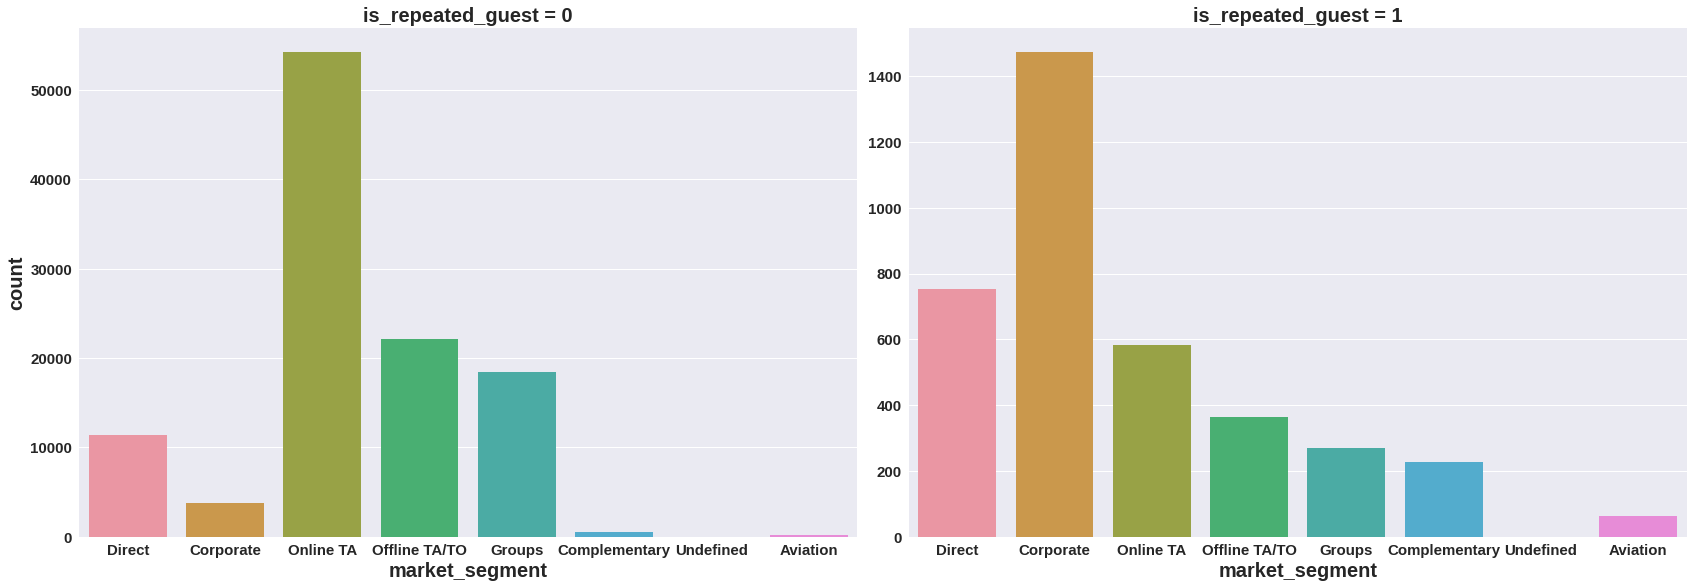

In [60]:
sns.catplot(data=hotel_df,x='market_segment',col='is_repeated_guest',kind='count',height=8.27,aspect=10/7,sharey=False)
plt.tight_layout()

* Repeated guests prefer Corpotate market segment the most.
* Non-repeated guests prefer online TA market segment the most.

## **Required car parking spaces**

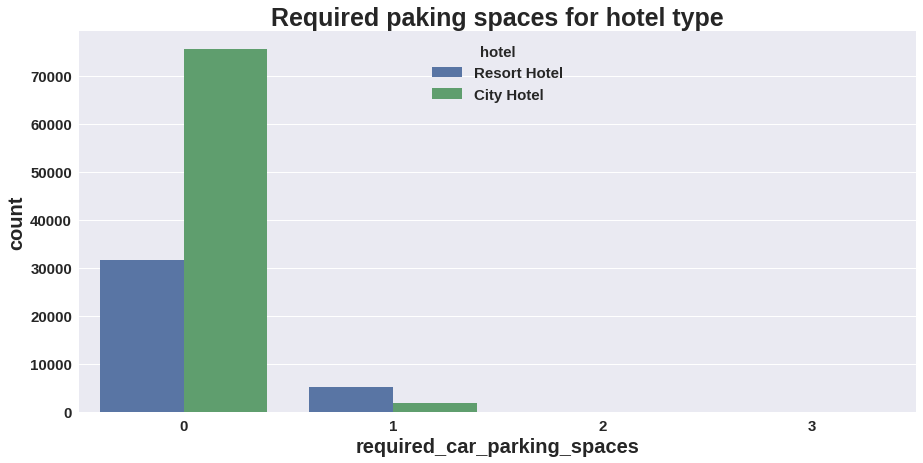

In [61]:
plt.figure(figsize=(15,7))
sns.countplot(x="required_car_parking_spaces", data = hotel_df,hue='hotel')
plt.title('Required paking spaces for hotel type');

* Both hotel types do not required parking spaces, but resort hotels are more likely to be required to have 1 paking space compared to city hotel.

## **How do special requests and required car parking spaces affect ADR**

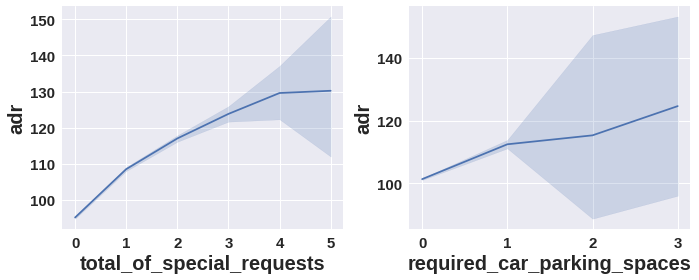

In [62]:
fig,axes=plt.subplots(1,2,sharey=False,figsize=(10,4))
sns.lineplot(data=hotel_df,x='total_of_special_requests',y='adr',ax=axes[0])
sns.lineplot(data=hotel_df,x='required_car_parking_spaces',y='adr',ax=axes[1])
plt.tight_layout();

## **Insights**
* As the number of special requests increase ADR also increases.
*As the number of car parking spaces increse ADR also increases slightly.

## **Which hotel type has the highest cancellations**

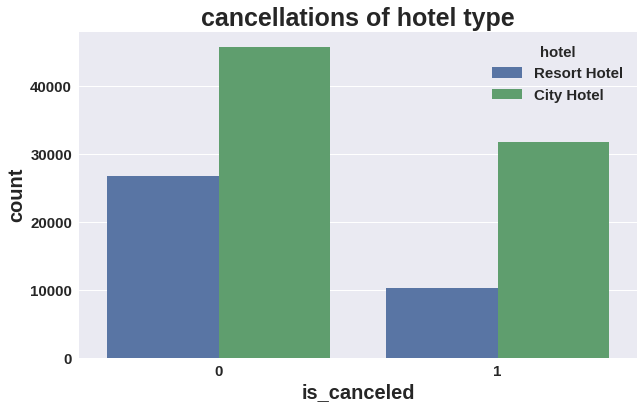

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(data=hotel_df,x='is_canceled',hue='hotel')
plt.title('cancellations of hotel type');

* Resort hotels have less cancellations

## Reservation status

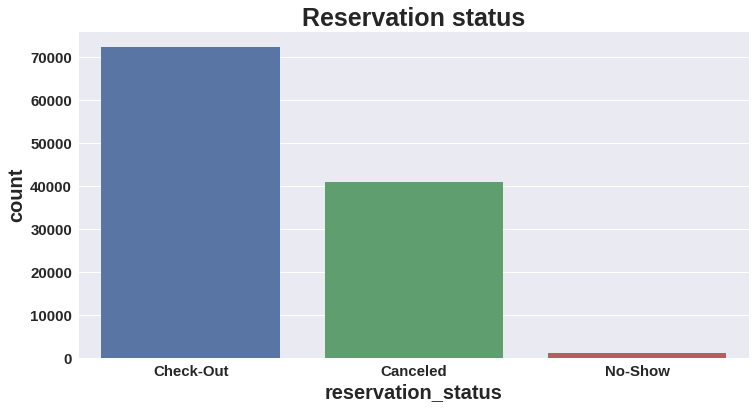

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(hotel_df['reservation_status'])
plt.title('Reservation status');

* Most guests checkout while least number of guests don't show up.

## **Heatmap of numeric variables**

Text(0.5, 1.0, 'Co-relation of the columns')

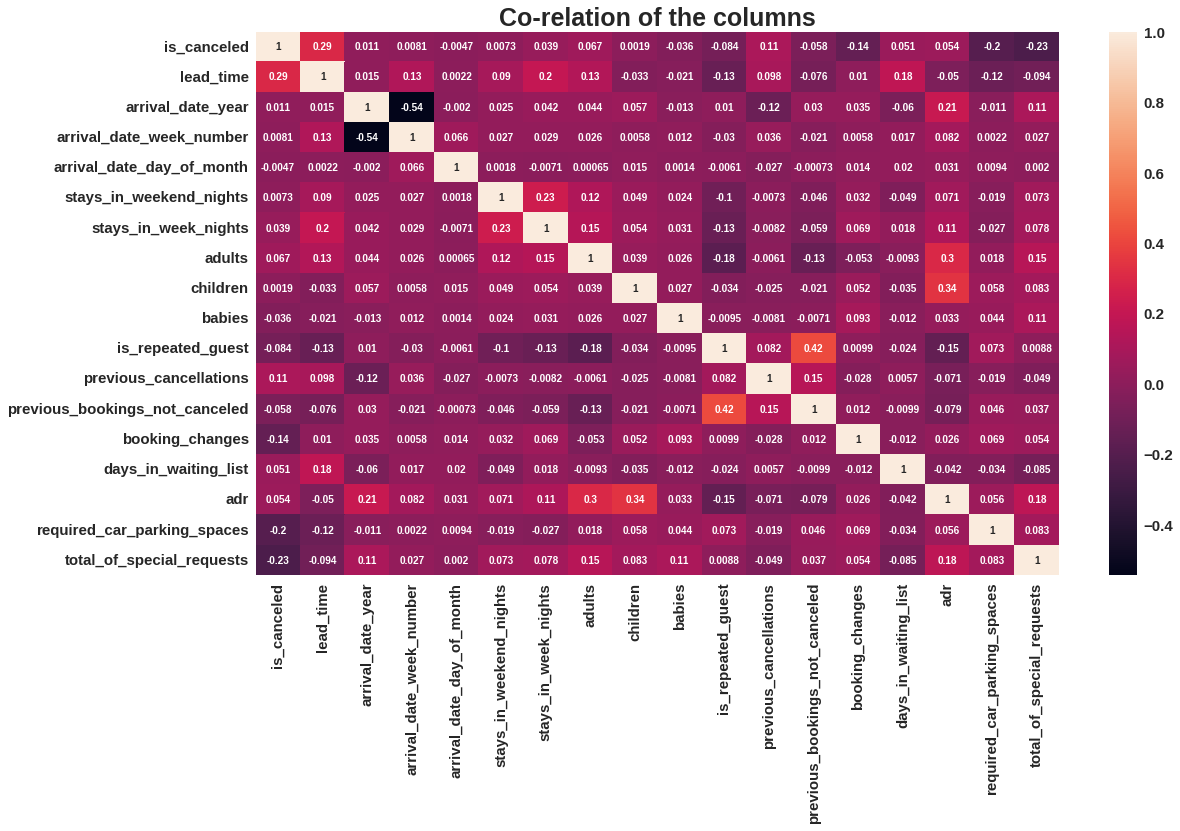

In [65]:
fig,axes = plt.subplots(1,1,figsize=(18,10))
sns.heatmap(hotel_df.corr(),annot=True)
plt.title('Co-relation of the columns',fontweight='bold',fontsize=25)


### **Insights**
* Hightest Positive correlation of 0.42 can be observed between the columns 'is_repeated_guest' and 'previous_bookings_not_canceled'.
* is_canceled column has highest co-relation with lead_time and total_of special_resquests.




# **Conclusion**
> * Resort hotels tend to have less bookings in comparison to city hotels so they need to work on their marketing strategy and promote the hotels more, especially on social media.
* May-August happens to be the busiest months but so the hotels should target more customers and try to do more business during these times.
* It is quite clear most customers travel in pairs and bringing children or babies along are very rare so the hotels could advertise in ways that attract couples more and also business travellers.
* Most people eat their breakfast at hotel and for lunch and dinner they may go to eateries so here we can collaborate with different eateries and we can refer people to the eateries of their preference. And we can provide some coupon code to the customers and whenever they use our coupon code at any eateries we will get some commission in return.
* Hotel has  very few repeated guest, feedback can be collected to plan strategies accordingly.
* Hotel should collaborate with online marketing companies to advertise itself.



